In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
# import data
data = pd.read_csv(filepath_or_buffer='assets/diabetes_dataset_with_notes.csv')
data.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [36]:
data.columns


Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes', 'clinical_notes'],
      dtype='object')

## Exploratory Data Analysis

In [13]:
data.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


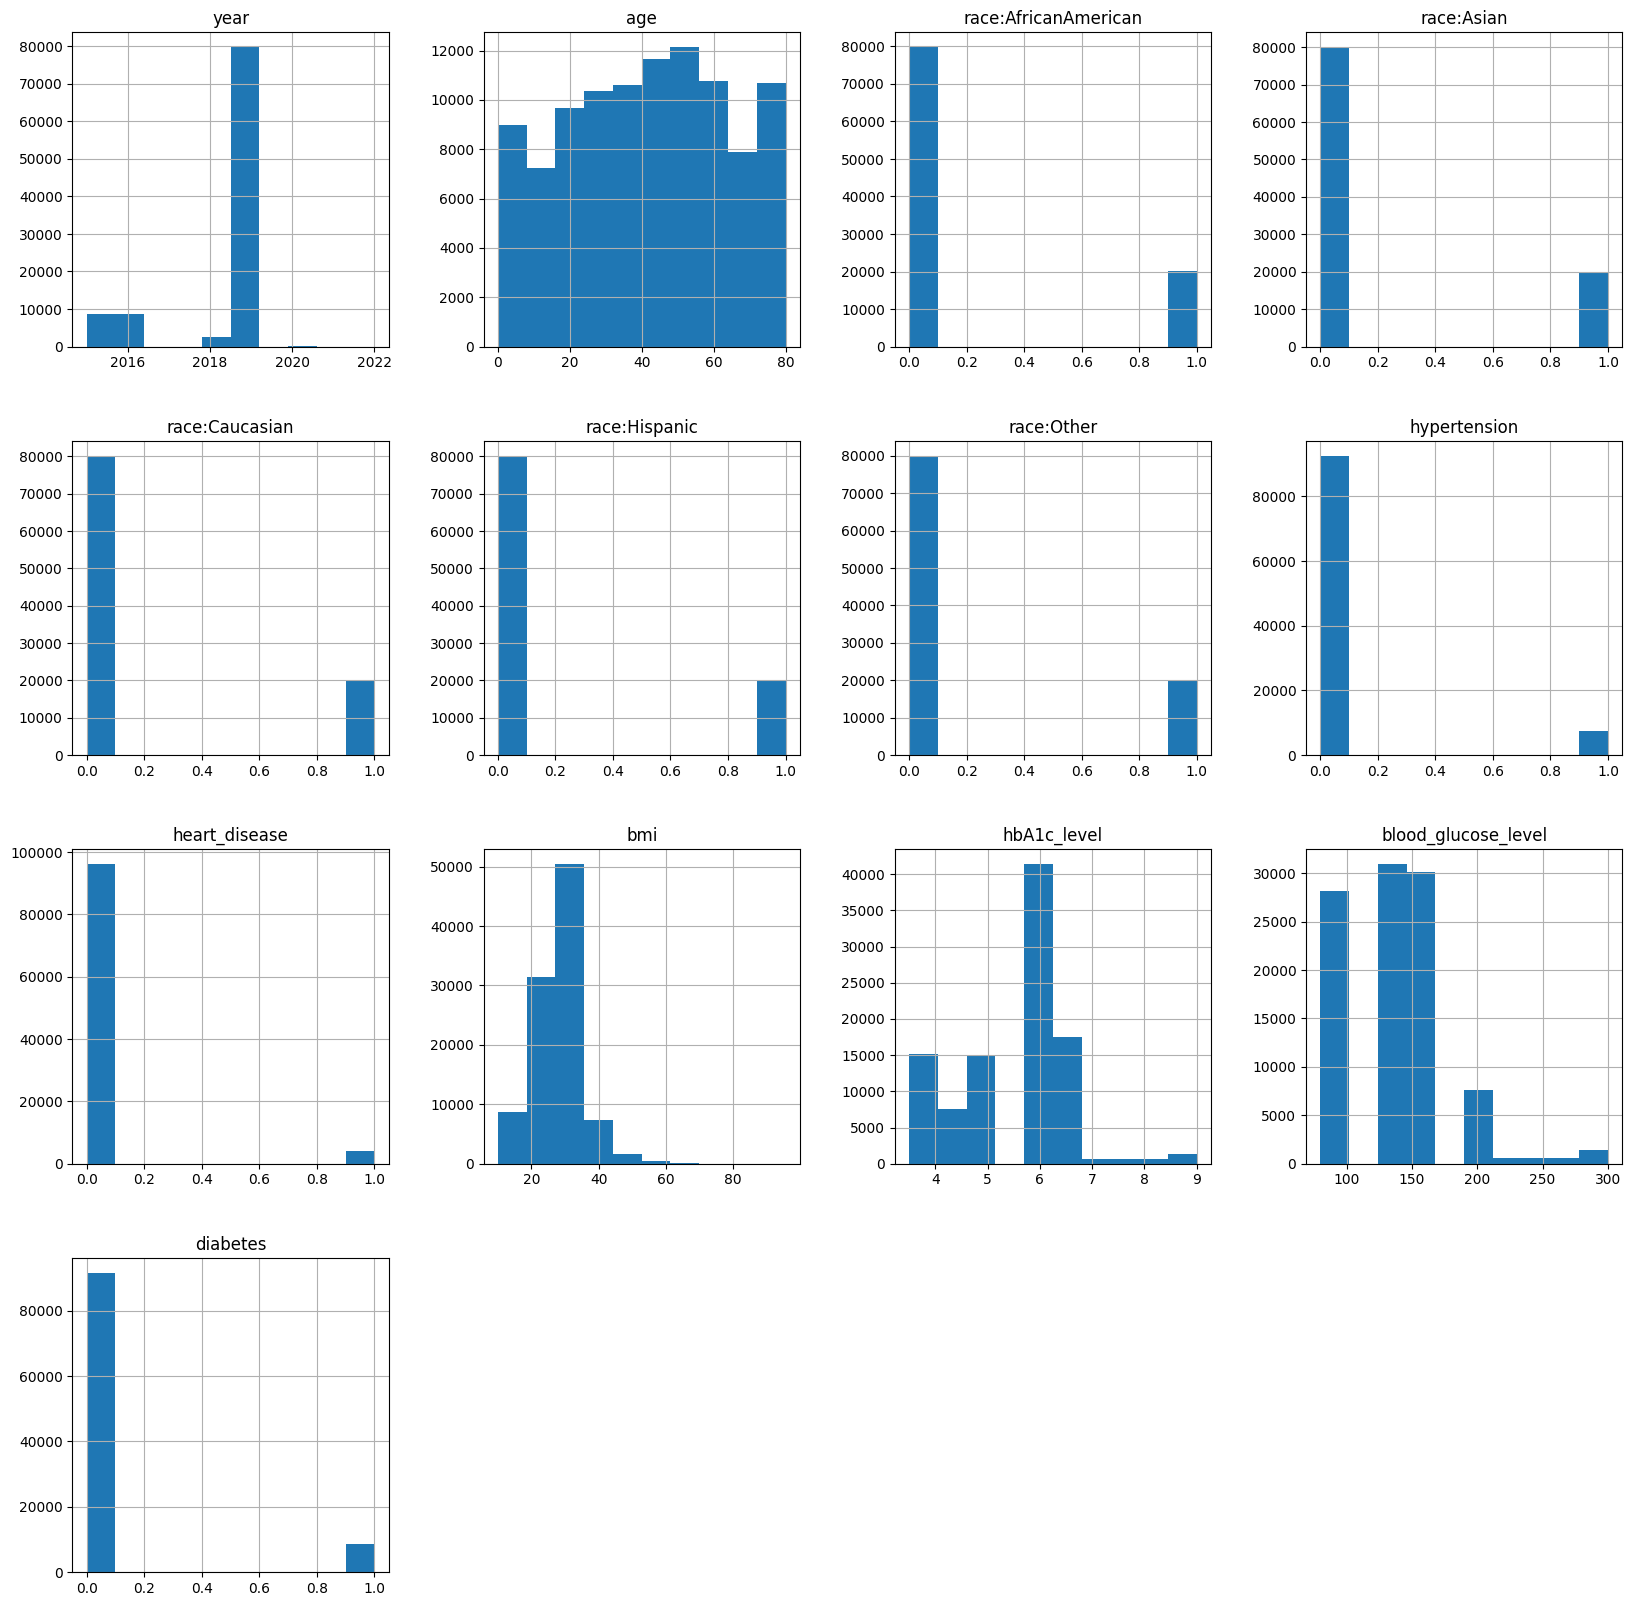

In [14]:
# Lets a histogram of all features
data.hist(figsize=(20,20))
plt.show()

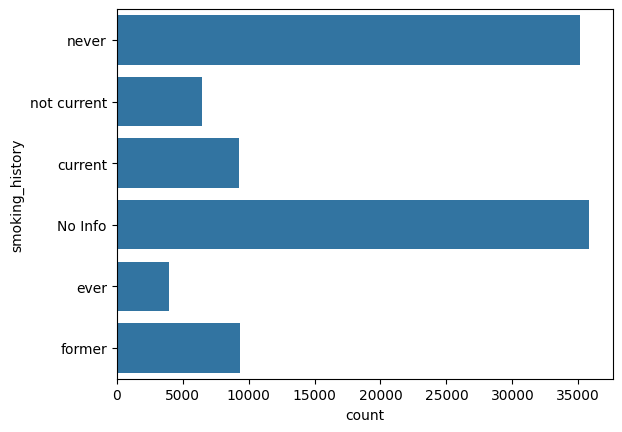

In [15]:
sns.countplot(y='smoking_history',data=data)
plt.show()

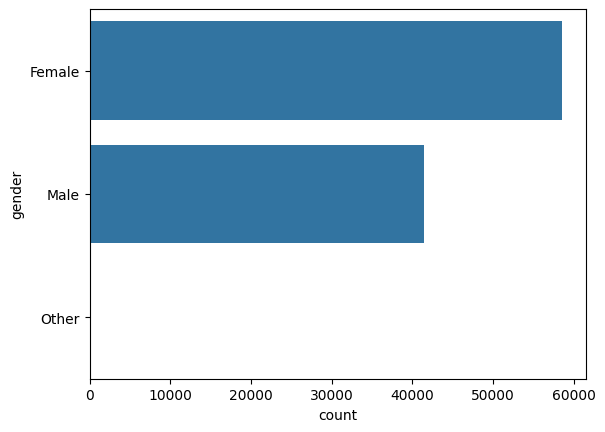

In [16]:
sns.countplot(y='gender',data=data)
plt.show()

In [17]:
## Check missing values
data.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
clinical_notes          0
dtype: int64

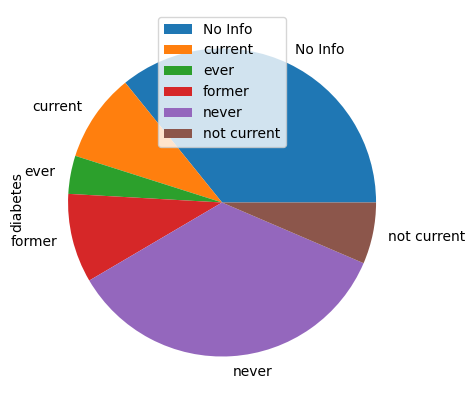

In [18]:
# Creating a pie chart to count diabetics
df_smoking_history = data.groupby(['smoking_history']).count()[['diabetes']]
df_smoking_history.head()
df_smoking_history.plot.pie(y='diabetes', figsize=(5, 5))
plt.legend(loc = 0)
plt.show()

In [19]:
print("Percentage of Diabetics is {:.1f}% and non-diabetics is: {:.1f}%".format(
    data[data['diabetes'] == 1].shape[0] / data.shape[0]*100,
    data[data['diabetes'] == 0].shape[0] / data.shape[0]*100),
)

Percentage of Diabetics is 8.5% and non-diabetics is: 91.5%


## TODO: We need to balance the dataset in future effort

Remove the columns containing missing values

In [52]:
df = data
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Convert 'year' to datetime format, inferring that it represents the year
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Optionally, create a full datetime column (e.g., setting month and day to 1)
df['date'] = df['year']  # In this dataset, we only have the year information

# Convert categorical columns to type 'category'
categorical_cols = ['gender', 'location', 'smoking_history']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# A quick summary of the dataframe after cleaning
print('Data types after cleaning:')
print(df.dtypes)

# Display summary statistics
df.describe(include='all')

Missing values in each column:
year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
clinical_notes          0
dtype: int64
Data types after cleaning:
year                    datetime64[ns]
gender                        category
age                            float64
location                      category
race:AfricanAmerican             int64
race:Asian                       int64
race:Caucasian                   int64
race:Hispanic                    int64
race:Other                       int64
hypertension                     int64
heart_disease                    int64
smoking_history               category
bmi                

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes,date
count,100000,100000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000
unique,NaN,3,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,761,NaN
top,NaN,Female,NaN,Iowa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN,"Overweight, advised dietary and exercise modif...",NaN
freq,NaN,58552,NaN,2038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN,4650,NaN
mean,2018-05-12 12:34:55.200000,NaN,41.885856,NaN,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000,NaN,2018-05-12 12:34:55.200000
min,2015-01-01 00:00:00,NaN,0.080000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000,NaN,2015-01-01 00:00:00
25%,2019-01-01 00:00:00,NaN,24.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000,NaN,2019-01-01 00:00:00
50%,2019-01-01 00:00:00,NaN,43.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000,NaN,2019-01-01 00:00:00
75%,2019-01-01 00:00:00,NaN,60.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000,NaN,2019-01-01 00:00:00
max,2022-01-01 00:00:00,NaN,80.000000,NaN,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,NaN,95.690000,9.000000,300.000000,1.000000,NaN,2022-01-01 00:00:00


In [21]:
data.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes,date
0,2020-01-01,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif...",2020-01-01
1,2015-01-01,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.,2015-01-01
2,2015-01-01,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ...",2015-01-01
3,2015-01-01,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif...",2015-01-01
4,2016-01-01,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ...",2016-01-01


In [37]:
# Imports and Setup

# Suppress warnings for a cleaner notebook output
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Use the Anti-Grain Geometry backend
import matplotlib.pyplot as plt
%matplotlib inline
# plt.switch_backend('Agg')  # Ensures compatibility with non-interactive backends

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

# Set default styles for seaborn
sns.set(style='whitegrid', context='notebook')

print('Libraries imported and notebook setup complete.')

Libraries imported and notebook setup complete.


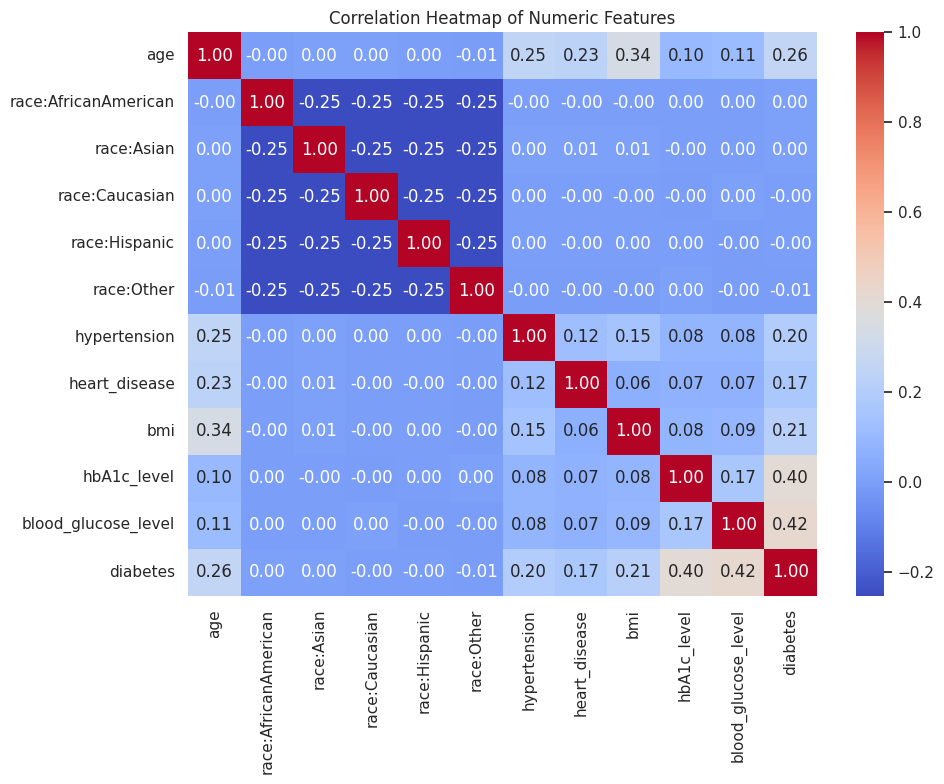

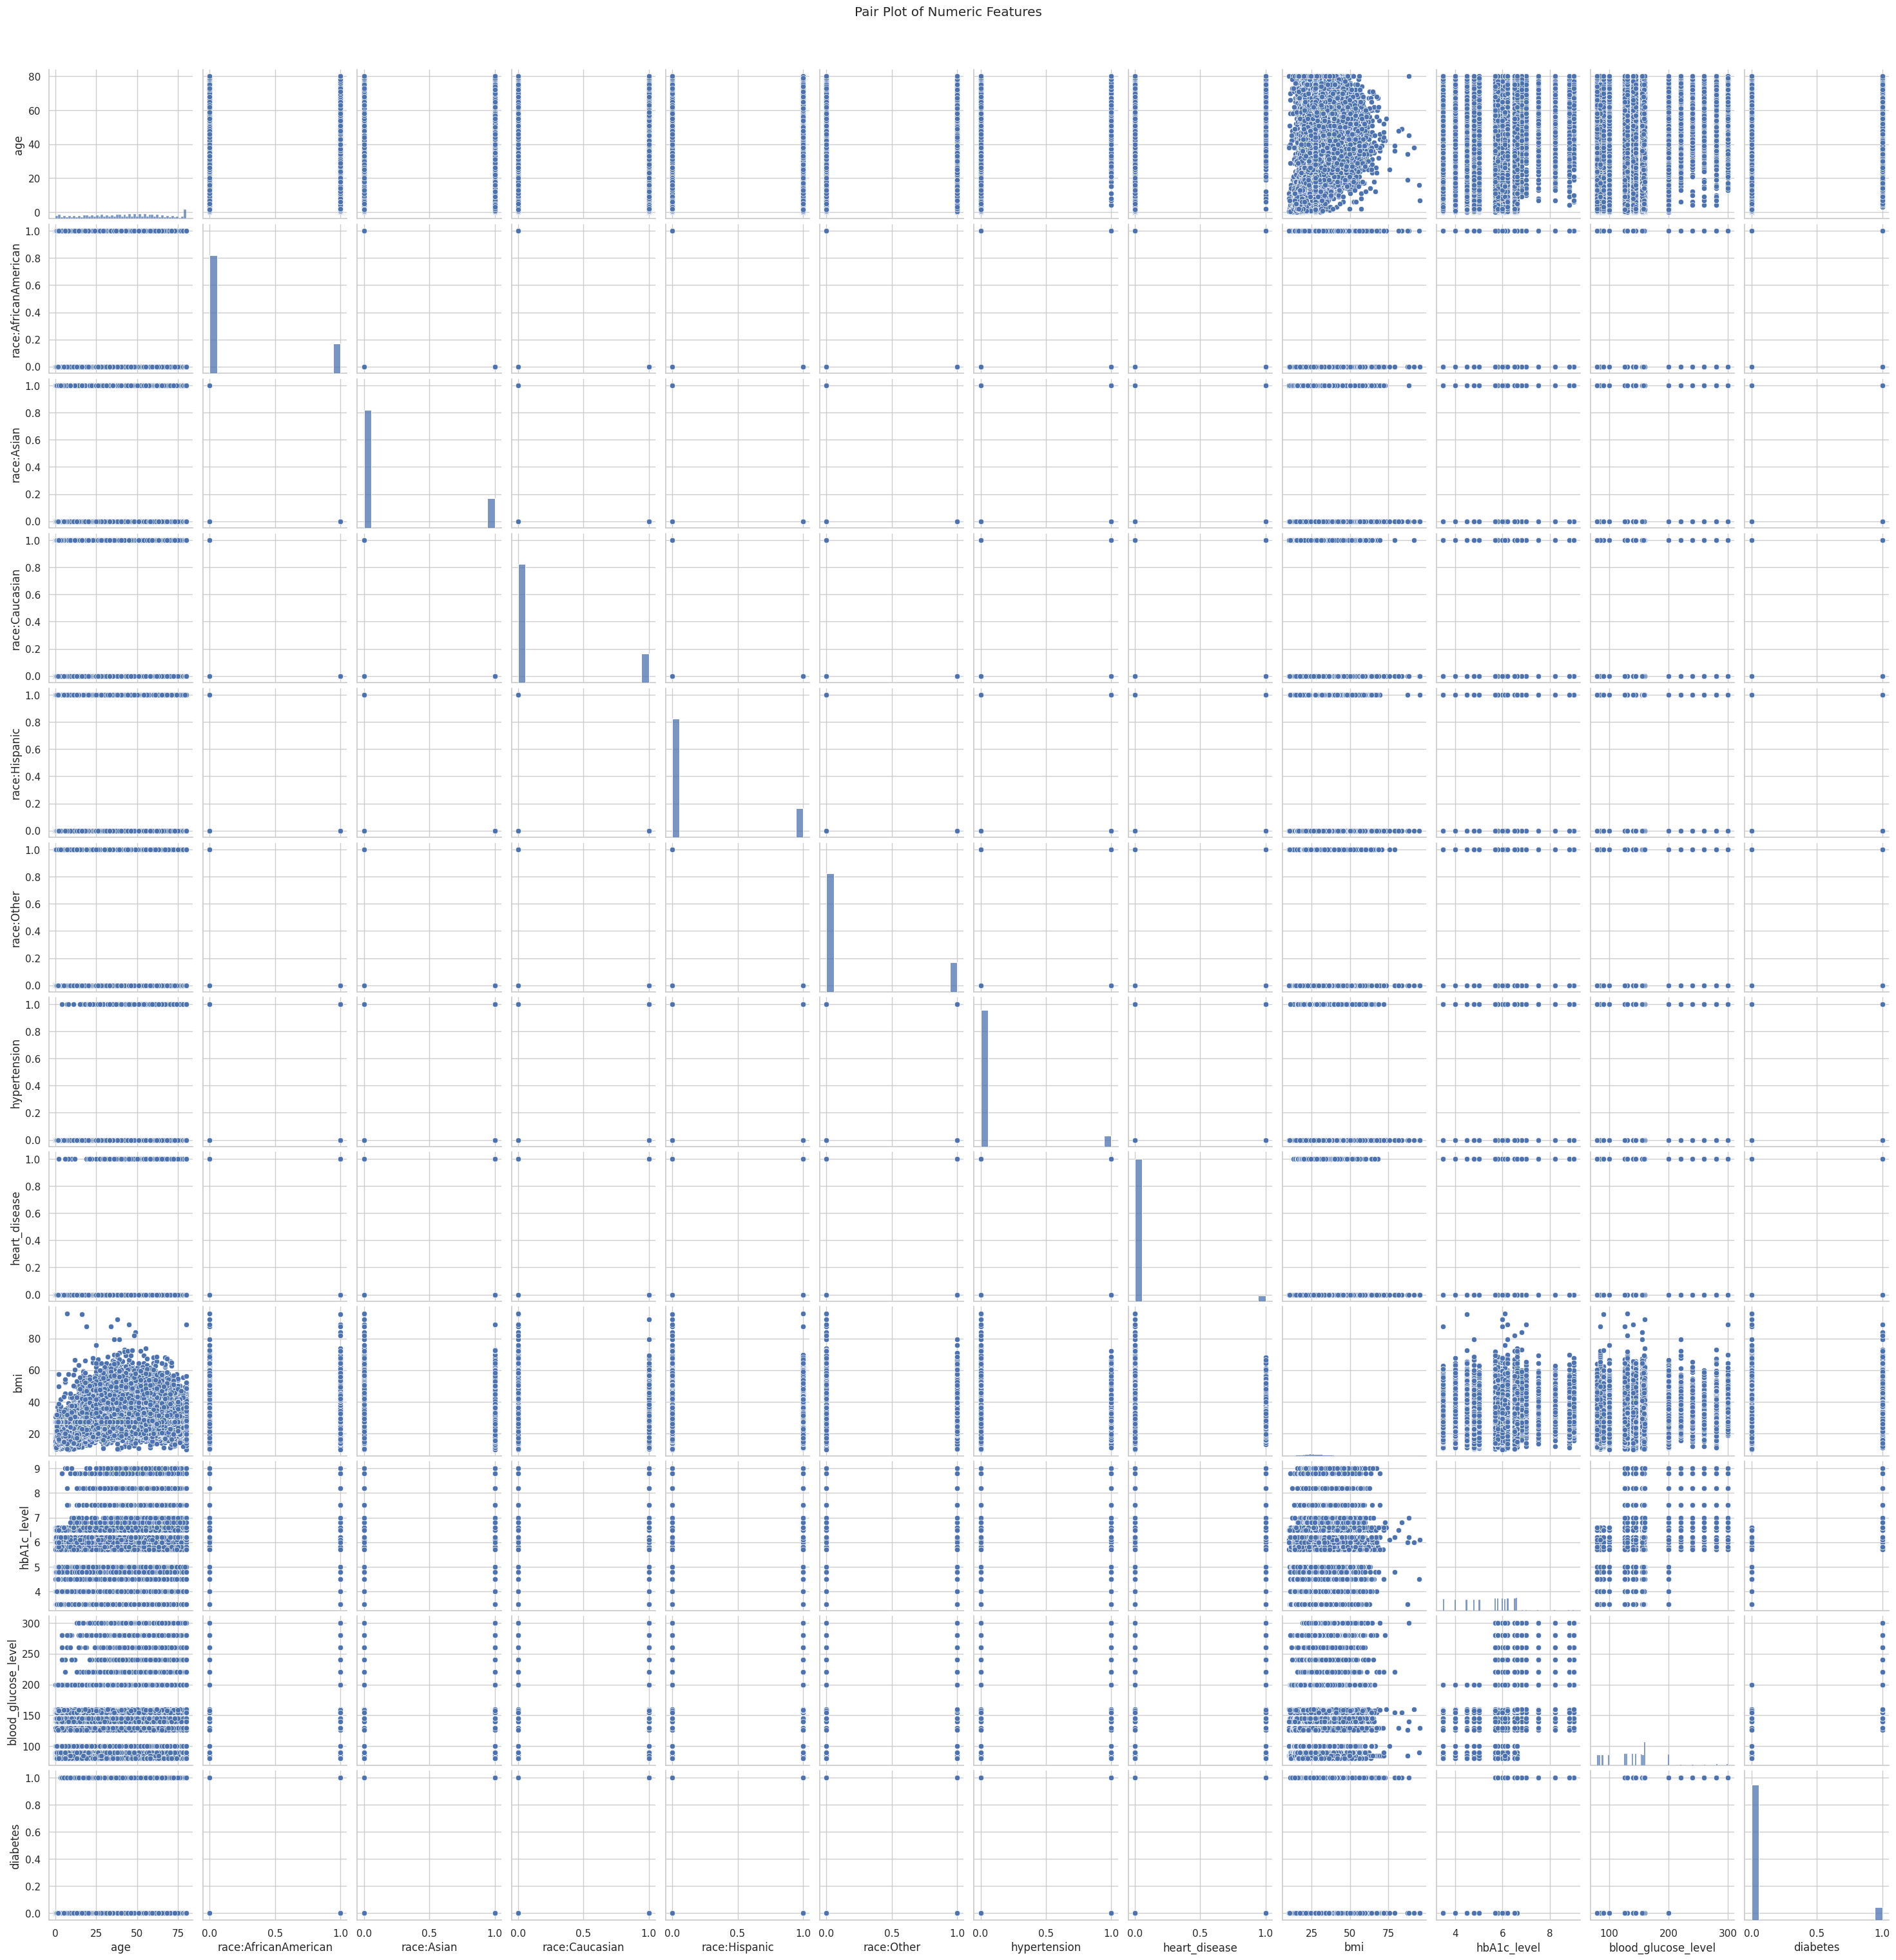

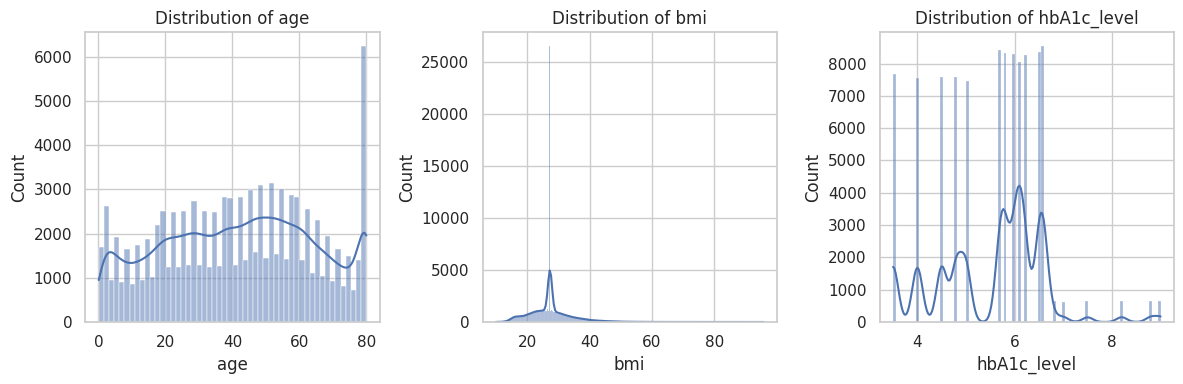

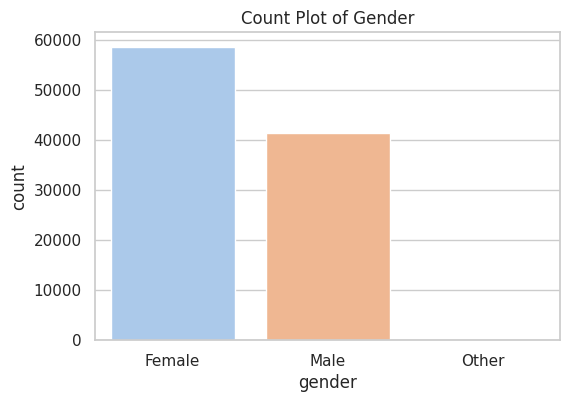

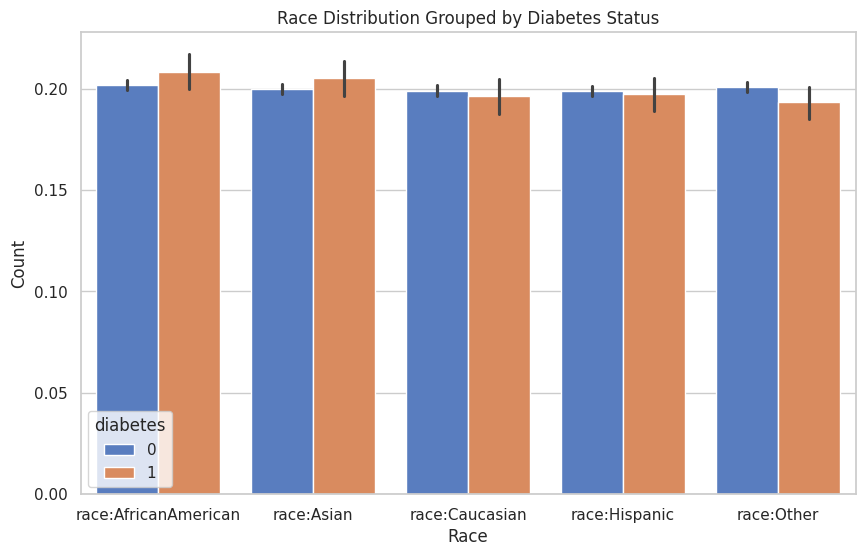

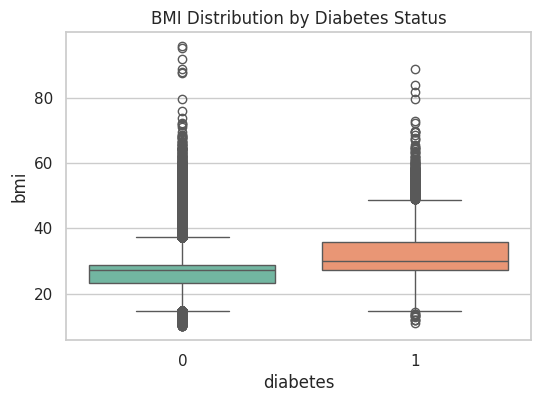

In [23]:
# Exploratory Data Analysis

import matplotlib.gridspec as gridspec

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap (only if four or more numeric columns are present)
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# Pair Plot for a subset of the numeric variables to visualize pairwise relationships
sns.pairplot(numeric_df.dropna())
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

# Histogram for numeric distributions - age, bmi, hbA1c_level
plt.figure(figsize=(12,4))
for i, col in enumerate(['age', 'bmi', 'hbA1c_level']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Count plot for categorical variables such as gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Count Plot of Gender')
plt.show()

# Grouped Bar Plot for race distribution across diabetes statuses
race_cols = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']
race_df = df[race_cols + ['diabetes']].copy()
race_df = race_df.melt(id_vars='diabetes', var_name='Race', value_name='Count')

plt.figure(figsize=(10,6))
sns.barplot(data=race_df, x='Race', y='Count', hue='diabetes', palette='muted')
plt.title('Race Distribution Grouped by Diabetes Status')
plt.show()

# Box Plot for BMI grouped by diabetes status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='diabetes', y='bmi', palette='Set2')
plt.title('BMI Distribution by Diabetes Status')
plt.show()

## Predictive Modeling

#### Data Preprocessing

In [65]:
from sklearn.preprocessing import StandardScaler

# Prepare the dataset for modeling. Drop columns that are non-numeric and not needed for modelling
model_df = df.drop(columns=[
    'clinical_notes', 'year', 'date',
    ])

# Convert categorical variables using one-hot encoding
model_df = pd.get_dummies(model_df, drop_first=True)

# Remove location colums
model_df = model_df.drop(columns=[
    'location_Arkansas', 'location_California', 'location_Colorado',
       'location_Connecticut', 'location_Delaware',
       'location_District of Columbia', 'location_Florida', 'location_Georgia',
       'location_Guam', 'location_Hawaii', 'location_Idaho',
       'location_Illinois', 'location_Indiana', 'location_Iowa',
       'location_Kansas', 'location_Kentucky', 'location_Louisiana',
       'location_Maine', 'location_Maryland', 'location_Massachusetts',
       'location_Michigan', 'location_Minnesota', 'location_Mississippi',
       'location_Missouri', 'location_Montana', 'location_Nebraska',
       'location_Nevada', 'location_New Hampshire', 'location_New Jersey',
       'location_New Mexico', 'location_New York', 'location_North Carolina',
       'location_North Dakota', 'location_Ohio', 'location_Oklahoma',
       'location_Oregon', 'location_Pennsylvania', 'location_Puerto Rico',
       'location_Rhode Island', 'location_South Carolina',
       'location_South Dakota', 'location_Tennessee', 'location_Texas',
       'location_United States', 'location_Utah', 'location_Vermont',
       'location_Virgin Islands', 'location_Virginia', 'location_Washington',
       'location_West Virginia', 'location_Wisconsin', 'location_Wyoming',

    ])

# Define features and target
X = model_df.drop('diabetes', axis=1)
y = model_df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for better performance of the logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

two_rows = model_df[model_df["diabetes"] == 1].iloc[20:25]

# Convert to list of dictionaries
list_of_dicts = two_rows.to_dict(orient='records')

list_of_dicts

[{'age': 56.0,
  'race:AfricanAmerican': 0,
  'race:Asian': 1,
  'race:Caucasian': 0,
  'race:Hispanic': 0,
  'race:Other': 0,
  'hypertension': 0,
  'heart_disease': 0,
  'bmi': 27.32,
  'hbA1c_level': 7.5,
  'blood_glucose_level': 155,
  'diabetes': 1,
  'gender_Male': True,
  'gender_Other': False,
  'location_Alaska': False,
  'location_Arizona': False,
  'smoking_history_current': False,
  'smoking_history_ever': False,
  'smoking_history_former': False,
  'smoking_history_never': False,
  'smoking_history_not current': True},
 {'age': 75.0,
  'race:AfricanAmerican': 0,
  'race:Asian': 1,
  'race:Caucasian': 0,
  'race:Hispanic': 0,
  'race:Other': 0,
  'hypertension': 0,
  'heart_disease': 0,
  'bmi': 28.69,
  'hbA1c_level': 9.0,
  'blood_glucose_level': 130,
  'diabetes': 1,
  'gender_Male': True,
  'gender_Other': False,
  'location_Alaska': False,
  'location_Arizona': False,
  'smoking_history_current': False,
  'smoking_history_ever': False,
  'smoking_history_former': True,

In [50]:
model_df = model_df.drop(columns=[
    'location_Arkansas', 'location_California', 'location_Colorado',
       'location_Connecticut', 'location_Delaware',
       'location_District of Columbia', 'location_Florida', 'location_Georgia',
       'location_Guam', 'location_Hawaii', 'location_Idaho',
       'location_Illinois', 'location_Indiana', 'location_Iowa',
       'location_Kansas', 'location_Kentucky', 'location_Louisiana',
       'location_Maine', 'location_Maryland', 'location_Massachusetts',
       'location_Michigan', 'location_Minnesota', 'location_Mississippi',
       'location_Missouri', 'location_Montana', 'location_Nebraska',
       'location_Nevada', 'location_New Hampshire', 'location_New Jersey',
       'location_New Mexico', 'location_New York', 'location_North Carolina',
       'location_North Dakota', 'location_Ohio', 'location_Oklahoma',
       'location_Oregon', 'location_Pennsylvania', 'location_Puerto Rico',
       'location_Rhode Island', 'location_South Carolina',
       'location_South Dakota', 'location_Tennessee', 'location_Texas',
       'location_United States', 'location_Utah', 'location_Vermont',
       'location_Virgin Islands', 'location_Virginia', 'location_Washington',
       'location_West Virginia', 'location_Wisconsin', 'location_Wyoming',

    ])

model_df.head()

KeyError: "['location_Arkansas', 'location_California', 'location_Colorado', 'location_Connecticut', 'location_Delaware', 'location_District of Columbia', 'location_Florida', 'location_Georgia', 'location_Guam', 'location_Hawaii', 'location_Idaho', 'location_Illinois', 'location_Indiana', 'location_Iowa', 'location_Kansas', 'location_Kentucky', 'location_Louisiana', 'location_Maine', 'location_Maryland', 'location_Massachusetts', 'location_Michigan', 'location_Minnesota', 'location_Mississippi', 'location_Missouri', 'location_Montana', 'location_Nebraska', 'location_Nevada', 'location_New Hampshire', 'location_New Jersey', 'location_New Mexico', 'location_New York', 'location_North Carolina', 'location_North Dakota', 'location_Ohio', 'location_Oklahoma', 'location_Oregon', 'location_Pennsylvania', 'location_Puerto Rico', 'location_Rhode Island', 'location_South Carolina', 'location_South Dakota', 'location_Tennessee', 'location_Texas', 'location_United States', 'location_Utah', 'location_Vermont', 'location_Virgin Islands', 'location_Virginia', 'location_Washington', 'location_West Virginia', 'location_Wisconsin', 'location_Wyoming'] not found in axis"

In [58]:
# FastAPI and HTTPException from FastAPI for building the API and handling errors.
from fastapi import FastAPI, HTTPException

# BaseModel from Pydantic to define a data structure that validates incoming request data.
from pydantic import BaseModel

# Typing imports (Dict, Any, Union, List) for type annotations.
from typing import Dict, Any, Union, List

# joblib for loading previously trained machine learning models.
import joblib

# pandas (pd) for data manipulation and creating DataFrames.
import pandas as pd

# os for file path operations.
import os


# Pydantic Model Definition. A class `SampleData` inherits from `BaseModel`:
# It has one field, `data`, which can be either a dictionary or a list of dictionaries.
# This allows the endpoint to accept either a single record or multiple records as input.
class SampleData(BaseModel):
    data: Union[Dict[str, Any], List[Dict[str, Any]]]

In [57]:
import json

json_str = '''
{
    "data": {
            "age": 32.0,
            "race_african_american": 0,
            "race_asian": 0,
            "race_caucasian": 0,
            "race_hispanic": 0,
            "race_other": 1,
            "hypertension": 0,
            "heart_disease": 0,
            "bmi": 27.32,
            "hbA1c_level": 5.0,
            "blood_glucose_level": 100,
            "diabetes": 0,
            "gender_Male": false,
            "gender_Other": false,
            "smoking_history_current": false,
            "smoking_history_ever": false,
            "smoking_history_former": false,
            "smoking_history_never": true,
            "smoking_history_not_current": false
      }
}
'''

# Check if valid
try:
    parsed = json.loads(json_str)
    print("✅ JSON is valid!")
except json.JSONDecodeError as e:
    print("❌ Invalid JSON:", e)


✅ JSON is valid!


In [62]:
m = SampleData(**parsed)

m.model_dump()

{'data': {'age': 32.0,
  'race_african_american': 0,
  'race_asian': 0,
  'race_caucasian': 0,
  'race_hispanic': 0,
  'race_other': 1,
  'hypertension': 0,
  'heart_disease': 0,
  'bmi': 27.32,
  'hbA1c_level': 5.0,
  'blood_glucose_level': 100,
  'diabetes': 0,
  'gender_Male': False,
  'gender_Other': False,
  'smoking_history_current': False,
  'smoking_history_ever': False,
  'smoking_history_former': False,
  'smoking_history_never': True,
  'smoking_history_not_current': False}}

#### Logistic Regression

Accuracy of Logistic Regression model: 0.96


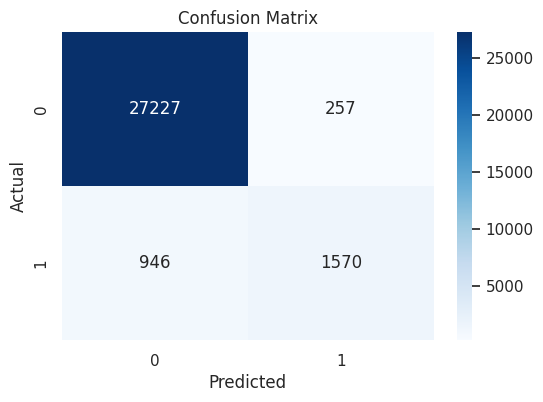

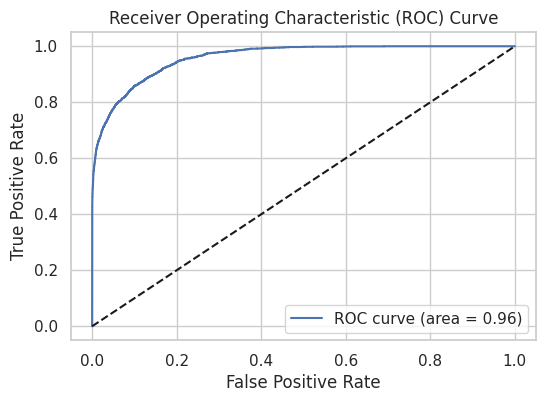

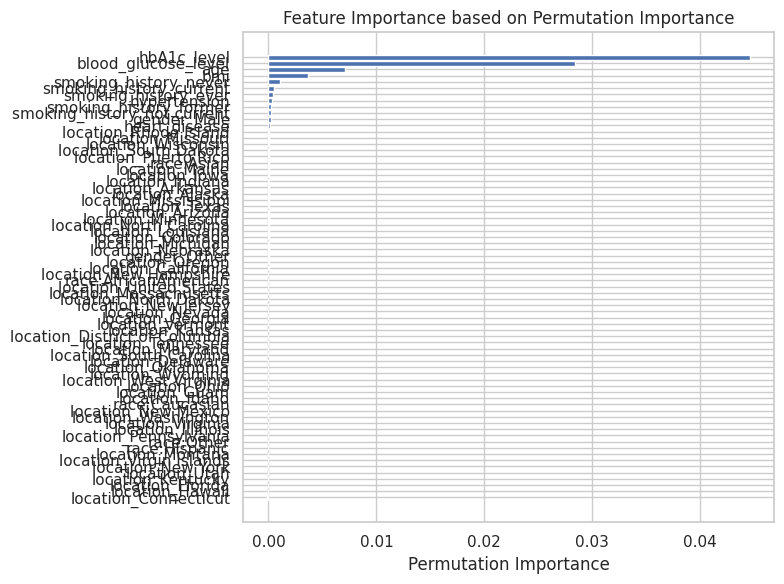

In [ ]:
# Predictive Modeling
# Instantiate and train the logistic regression model
model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5,max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression model: {acc:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Permutation Importance
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='accuracy')
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(8,6))
plt.barh(range(X.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance based on Permutation Importance')
plt.tight_layout()
plt.show()

#### Support Vector Machine

Accuracy of Logistic Regression model: 0.96


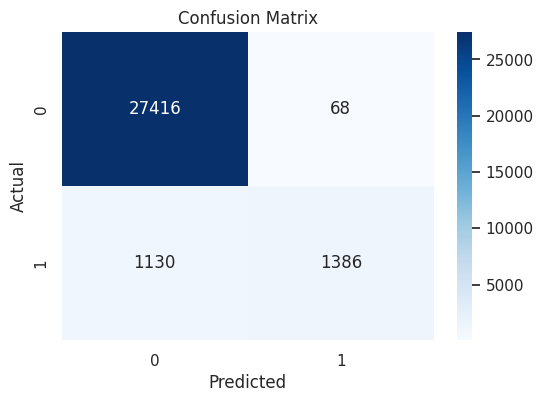

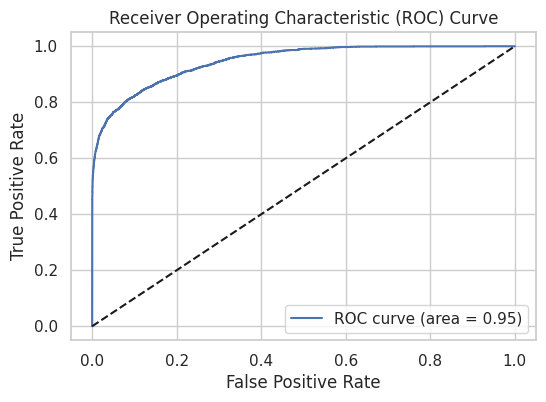

In [ ]:
# Predictive Modeling
from sklearn.svm import SVC

# Create an SVM classifier with a linear kernel
model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM Regression model: {acc:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Permutation Importance
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='accuracy')
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(8,6))
plt.barh(range(X.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance based on Permutation Importance')
plt.tight_layout()
plt.show()

We can see that some of the features does not correlate with the target column. Lets sort them

In [ ]:
data.corr()['diabetes'].sort_values()

Trainings_Attended                    -0.024345
Gender                                -0.010437
Previous_IntraDepartmental_Movement   -0.008289
Marital_Status                        -0.003853
No_of_previous_employers               0.001690
Foreign_schooled                       0.003202
Past_Disciplinary_Action               0.004830
State_Of_Origin                        0.005488
Channel_of_Recruitment                 0.006324
Year_of_recruitment                    0.012287
Division                               0.015582
Year_of_birth                          0.017991
Last_performance_score                 0.119690
Training_score_average                 0.178448
Previous_Award                         0.201434
Targets_met                            0.224518
Promoted_or_Not                        1.000000
Name: Promoted_or_Not, dtype: float64

We can see that only the last four features has significant correlation with the target

In [ ]:
## Separate features from target

X = data[['Targets_met','Previous_Award','Training_score_average','Last_performance_score']].values


In [ ]:
Y = data[['Promoted_or_Not']].values
Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## Split dataset into test and train 

In [ ]:
from sklearn.model_selection import train_test_split

X_train,  X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

## Building Our Models

In [ ]:
## Decision Tree 

from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# metrics

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.9220087700981415

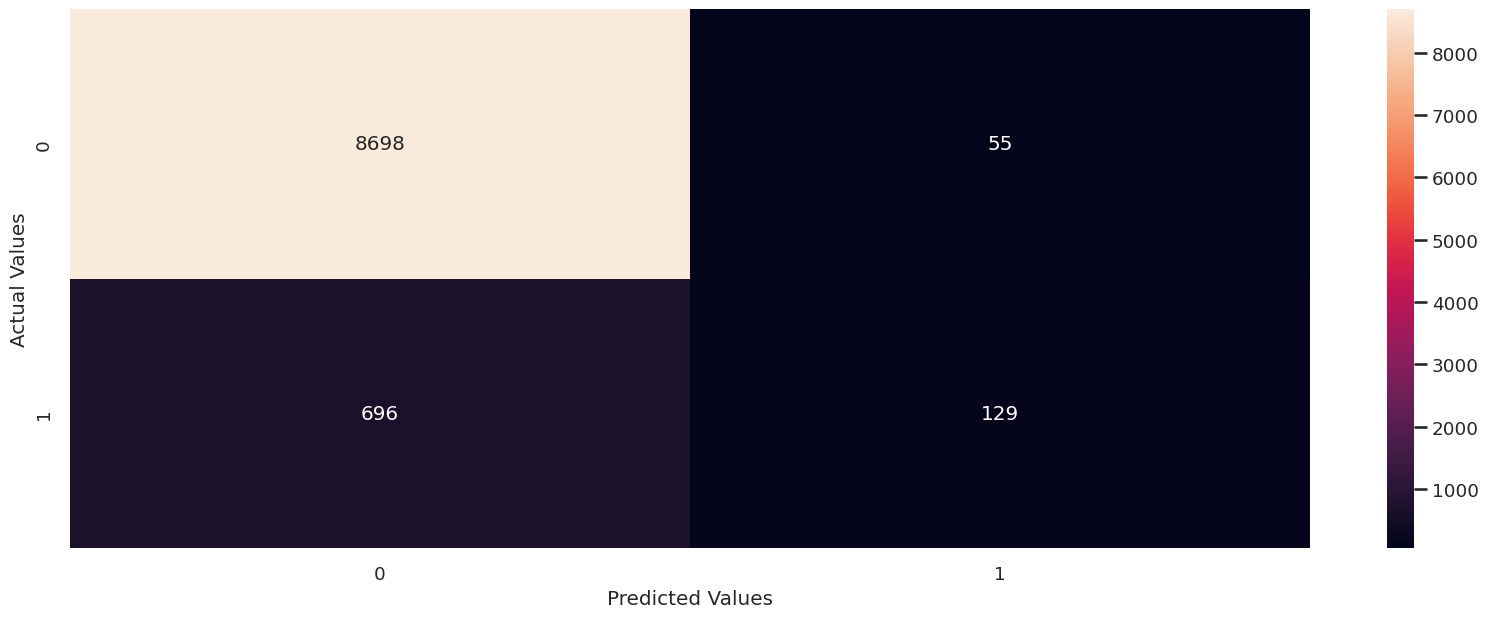

array([[8698,   55],
       [ 696,  129]])

In [ ]:
matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(data=matrix, annot=True, fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()
gideon12345?@
matrix

In [ ]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred

/home/chinedu/dataspan.ai/cv-data-app/orchestrator/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Metrics

accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.9147003549801629

In [ ]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred

/home/chinedu/dataspan.ai/cv-data-app/orchestrator/venv/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.9215911463771143